夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [1]:
import MeCab

mecab = MeCab.Tagger()

with open("neko.txt", "r") as f1, open("neko.txt.mecab", "w") as f2:
    lines = f1.readlines()
    for line in lines:
        result = mecab.parse(line)
        f2.write(result)

# 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
# Mecabの出力形式
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

with open("neko.txt.mecab", "r") as f:
    lines = f.readlines()
    sentence_list = []
    all_sentence_list = []
    for line in lines:
        dic = {}
        line = line.split("\t")
        if line[0] == "EOS\n":
            continue
        else:
            detail = line[1].split(",")
            dic["surface"] = line[0]
            if len(detail) <= 7:
                dic["base"] = line[0]
            else:
                dic["base"] = detail[6]
            dic["pos"] = detail[0]
            dic["pos1"] = detail[1]
            sentence_list.append(dic)
            if line[0] == "。":
                all_sentence_list.append(sentence_list)
                sentence_list = []

all_sentence_list[0:3]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}

# 31. 動詞
動詞の表層形をすべて抽出せよ．

In [3]:
verb = set()
for sentence in all_sentence_list:
    for word in sentence:
        if word["pos"] == "動詞":
            verb.add(word["surface"])

print(verb)

{'見張っ', 'ふれ', '滅入っ', '吹き込ん', '習い', '端折り', '寄っ', '褪め', '与える', '充たす', 'のべる', 'しょ', 'つかまっ', 'ひっくり返し', '見渡す', 'おどり', '重なる', '行う', '心付か', 'もぐる', '刈っ', 'ねじ上げ', '付く', 'せき込む', '立ち入り', '変りゃ', 'まわる', '飛ん', '拾い', '擦っ', '開け放し', '好ん', 'もぐっ', '褒め', '怒鳴りつけれ', '起そ', '破っ', '滑らし', '侵し', '打ちつけ', '睡ら', '飛び込も', '吸取り', 'おどる', '停', '通れ', '息ん', '光ら', '加わっ', '掛り', 'いらっしゃる', '復する', '静まり返っ', 'おり', 'すぼめる', '持て', '追い詰め', '顧み', 'はみ出し', 'かき', '書き入れ', '寝転ぶ', '横切っ', '去っ', '突き当っ', '惚れる', '仕ろ', '飛込ん', '愛する', '凹まし', '飲ま', '済まし', '振り', 'とまっ', '進ぜる', '待ち構え', '引き戻し', '吸い', '嵌っ', '跳ね返る', '罹る', '差し控え', '違わ', '見習お', 'のぼら', '食い', '及ば', 'たつ', '魂消る', 'いつわり', '渡す', '寄こし', 'くずさ', 'もぎとる', '叩き上げ', '取り払わ', '泣き', '話せ', 'せしめ', '計ら', '逢っ', 'とく', '近づき', '言い放っ', '消え失せ', '打ちゃ', '省け', '引っ張る', '掻きむしる', '待ち合せ', '素っ破抜く', '兼ね', '借りる', '教える', '構える', '裏返し', '歩い', 'からかお', '片付く', '帰る', '引きあげる', '担ぐ', '作ろ', '載せ', 'あずかり', 'つく', '刻ん', '食わせる', '図ら', '引き返し', '知ら', '振り撒い', '連れ', '生れ変っ', 'なぐる', '分ける', 'におっ', '響く', '抛', 'こし', '懸', '在り', '有ん', '見下し', '見馴れ', 

# 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [4]:
base_verb = set()
for sentence in all_sentence_list:
    for word in sentence:
        if word["pos"] == "動詞":
            base_verb.add(word["base"])

print(base_verb)

{'まじなう', 'ひるむ', 'うつ', '与える', '充たす', '滑べる', 'のべる', '究める', '見渡す', '重なる', 'とぶ', '断る', '急ぐ', '行う', 'ぱちつかせる', '見上ぐ', 'もぐる', 'せき込む', '付く', 'ためす', '並べ立てる', 'まわる', 'めぐらす', 'くらべる', '狂う', '融ける', '含む', 'おどる', 'いらっしゃる', '復する', 'すぼめる', 'つかまる', '係る', '寝転ぶ', '掬う', '惚れる', '愛する', '終える', '討つ', '進ぜる', '跳ね返る', 'うける', '罹る', '剰る', 'うめる', '割り出す', 'たつ', '魂消る', '渡す', 'もぎとる', 'ゆる', 'つかまえる', '見下ろす', 'とく', '遠のく', '引っ張る', '掻きむしる', '素っ破抜く', 'はおる', '申し渡す', '借りる', '教える', '構える', 'くむ', '出来上がる', '片付く', '帰る', '引きあげる', '担ぐ', '延ばす', 'つく', 'なぐる', '分ける', '引っ繰り返す', '気取る', '振り翳す', '吊るす', '響く', 'むき出す', '磨ける', '恋う', '詰め込む', 'ならべる', '鼓する', '勤める', '行く', '付き添う', '頼む', 'さす', 'ぶらつく', '並ぶ', '萌す', '埋める', '弾き出す', '学ぶ', '届け出る', '立て通す', '寝かす', '見下せる', 'のさばる', '尽きる', '因る', '鑑みる', '暮らす', '引張る', '劣る', '舞う', 'おどろかす', '取り合せる', '装う', '勝つ', '逃げ延びる', '拱く', '絞る', '欠く', '知らせる', '叱る', 'はる', '称える', '読み直す', '添う', '差し出す', '巻き込む', '安んずる', '凝らす', '登る', '濡れる', 'させる', '誘う', '突き出す', '縛り付ける', 'よそう', '覆す', '拝する', '浮べる', '諦める', 'ひねくる', 'こまる', '卸す', '欠ける', 'わる'

# 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [5]:
noun_phrase = set()
for sentence in all_sentence_list:
    for i in range(1, len(sentence) - 2):
        if (
            sentence[i]["surface"] == "の"
            and sentence[i - 1]["pos"] == "名詞"
            and sentence[i + 1]["pos"] == "名詞"
        ):
            noun_phrase.add(
                sentence[i - 1]["surface"] + "の" + sentence[i + 1]["surface"]
            )

print(noun_phrase)

{'襖の影', '息子の個性', '東京の本社', 'ブラクストーンの説', '考究の結果', '北側の空地', '宅の書生', '介の代理', '方寸のうち', '輪のくせ', '他の暗黒', 'あしたの朝', '自炊の仲間', '頭の裏', '西洋の音楽', '葉蘭の影', '小鼻の左右', '室内の動静', '通りの次第', 'ストーブの前', '料理のよう', '奥の部屋', '伝来の仏壇', '一種の色', 'ただの所', '清廉の君子', '寒月の方', '博士の姪', '千秋の思', '主人の顔色', '身の危険', '万丈の都会', '磁気の研究', '県の生徒', '燃殻のよう', '夜光の明', '馬鹿の癖', '唐桟の半纏', '素足の責任', '主人の屋敷', '鈴木の君代', '人生の目的', '何の役割', '股の所', '君の声', '自己の思い', '自身の要求', '必然の勢', '個の老人', '格子戸のベル', '恐悦の体', '蟆の事', '以上の径路', '左の耳', '彼の気焔', '有名の大家', 'ほかのもの', '万全の策', '師の遺誡', '憎悪の念', '丹波の国', '臘の哲学', '何の因果', '学生の攻撃', '烏の勘', '教育の青年', '沈吟の体', '個人の交際', '烏金の長範', '伯父の牧山', '時の主人', '吾輩の似顔', '好奇の心', '人間の品', 'さっきの女', '自分の声', '成功の紀', '思いのほか', '諸君の名誉', '天下の妻君', '自己のため', 'ままの姿勢', 'ヴァイオリンの古物', '壁のしみ', '列の中', '戦争の一', '元信の幅', '女の声', '鼻の娘', '時の語気', '主人の一', '智識の威厳', 'トチメンボーの材料', '部屋のなか', '迷亭の鋭鋒', '君の模写', '世の中の奴', 'いろいろの注意', '室の中', '自分の勢力', '独特の伎倆', '眼の下', '川の底', '洗湯の逆上', '老人の服装', '顔の先', '屋のシャツ', '合の反響', '吾輩の脳裏', 'どこの何者', '胃の加減', '以上の感想', '輩の機能', '穴の動物', '双方の間', '披露のとき', 'そりのそり', '

# 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [6]:
noun_conjunction = set()
for sentence in all_sentence_list:
    text = ""
    count = 0
    for word in sentence:
        if word["pos"] == "名詞":
            text += word["surface"]
            count += 1
        else:
            if count >= 2:
                noun_conjunction.add(text)
            text = ""
            count = 0

print(noun_conjunction)

{'おい諸君', 'ゃもじの上', '吾輩これ', '出来損', 'ひま人', '暁方', '精神修養', '曰く水', '塊まり', '命令中', '約束通り', '僕等', 'かん猪口', '遺憾千万', '三代将軍', '候間', 'いたずら者', 'ホホホホいや', 'あと大', '東京市', '八畳敷', '如是観', '三つ目', '知識巨匠', '十八九', '大変目', '西洋手拭', '——お前', 'その後東京', '一冊', '瘋癲病者', '情線', '本色', '九十四歳', '碌々勉強', '自殺クラブ', '屋賃', '芋坂', '東西両国', 'これ等', '砲隊', '授業以外', '候秘術綱要一部', 'なあに漢学者', 'めん子さん', '三四個月', '成下候', '盲猫', '金縁眼鏡', '馬鹿竹', '何者たる', '一時其極', '吾物顔', 'こん畜生', '好男子水島寒月君', '自尊自信', '物指', '偶然君', '論理学', '京焼', '志願兵', '野蛮的行動', '五六分', '大分県', '日自分', 'ホホホ口', 'せんだって東北凶作', '鉄砲風呂', '際武右衛門君', '牡蠣的生涯', '自己以外', '個性保護', '先刻一', '直覚的', '天然居士以上', '出ずるよう', '吾輩自ら余瀾', '大分苦痛', '火消壺', '先幾人', '最後生涯', '十人十色', 'ハハハハ私', '通り静か', '事彼', '——いや身分', '自覚心', 'いくら性', '四時間以上', '君の', '初め学校', '水瓜', '小判形', '筋向', '泥溝', '紅塵万丈', '奴め最後っ屁', '幾缶', '惜哉障子越し', 'これぎりかいと', '昨夜寒月', 'せんだって日本新聞', '上貧乏', '一尺立方', '二疋', '文学的', '積極的積極的', '積極の', '通り奥山', '二十分', '間板', '石地蔵', '——幸いヴァイオリン', '麺麭', '明治三十八年何月何日戸締り', '顔面神経', '人工的', '力学的研究', '党勢不振', '一杯一杯一杯', 'それ以外', '植木屋', '蒟蒻閻魔', '先生樽', '十二人', 'うち頭', '明治三十

# 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [7]:
from collections import Counter

words = []
for sentence in all_sentence_list:
    for word in sentence:
        words.append(word["surface"])

frequency = Counter(words)
print(frequency)

Counter({'の': 9194, '。': 7486, 'て': 6868, '、': 6772, 'は': 6420, 'に': 6243, 'を': 6071, 'と': 5508, 'が': 5337, 'た': 3988, 'で': 3806, '「': 3231, '」': 3225, 'も': 2479, 'ない': 2390, 'だ': 2363, 'し': 2322, 'から': 2032, 'ある': 1728, 'な': 1613, 'ん': 1568, 'か': 1530, 'いる': 1249, '事': 1207, 'へ': 1034, 'う': 992, 'する': 992, 'もの': 981, '君': 973, 'です': 973, '云う': 937, '主人': 932, 'よう': 696, 'ね': 683, 'この': 649, '御': 636, 'ば': 617, '人': 602, 'その': 576, '一': 554, 'そう': 546, '何': 539, 'なる': 531, 'さ': 514, 'よ': 509, 'なら': 483, '吾輩': 481, 'い': 478, 'ます': 458, 'じゃ': 448, '…': 433, 'これ': 414, '\u3000': 411, 'なっ': 404, 'それ': 381, '来': 364, 'れ': 356, '見': 350, 'でも': 346, '時': 345, '迷亭': 343, 'ませ': 330, 'いい': 320, '三': 319, '——': 319, 'まで': 313, 'ところ': 313, '方': 312, '二': 303, 'ず': 299, '上': 294, 'まし': 289, '寒月': 286, '顔': 282, 'ぬ': 277, '先生': 274, '見る': 273, '人間': 272, 'だろ': 270, 'くらい': 269, '僕': 268, 'たら': 262, 'さん': 260, 'なく': 258, '気': 250, 'あり': 249, '猫': 248, 'だけ': 246, '出': 245, '出来': 244, '云っ': 241, 'また': 2

# 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

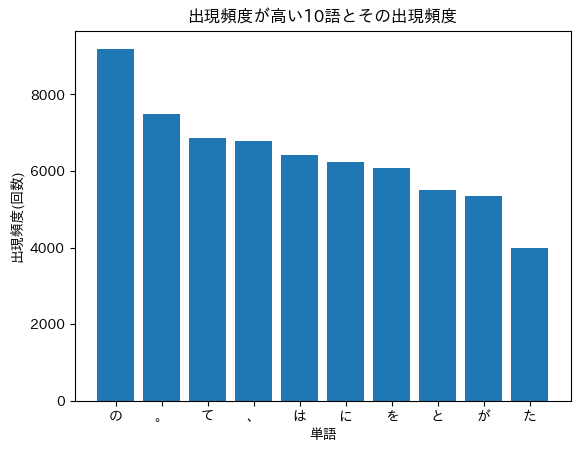

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib

word, count = zip(*frequency.most_common())  # 出現回数順に並べた要素・出現回数のタプルを取得
    
plt.bar(x = word[:10], height = count[:10])
plt.title("出現頻度が高い10語とその出現頻度")
plt.xlabel("単語")
plt.ylabel("出現頻度(回数)")
plt.show()

# 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

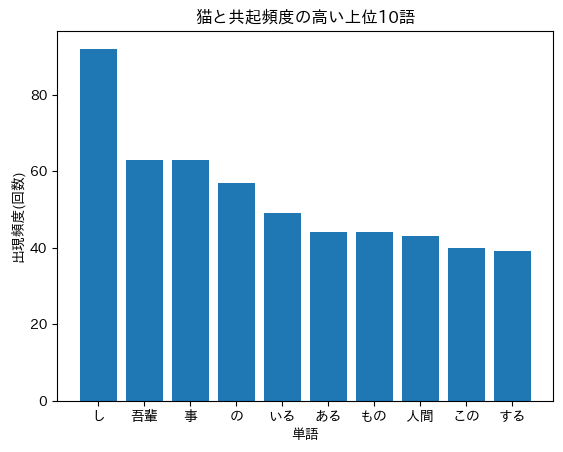

In [29]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

neko_list = []
for sentense in all_sentence_list:
    text = []
    Flag = 0
    for word in sentense:
        if "猫" in word["surface"]:
            Flag = 1
            continue
        if word["pos"] not in ["記号","助詞","助動詞"]:
            text.append(word["surface"])
    if Flag == 1:
        neko_list.append(text)

all_neko_list=[]
for lst in neko_list:
    all_neko_list.extend(lst)

frequency=Counter(all_neko_list)

word, count = zip(*frequency.most_common())  # 出現回数順に並べた要素・出現回数のタプルを取得
    
plt.bar(x = word[:10], height = count[:10])
plt.title("猫と共起頻度の高い上位10語")
plt.xlabel("単語")
plt.ylabel("出現頻度(回数)")
plt.show()


# 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

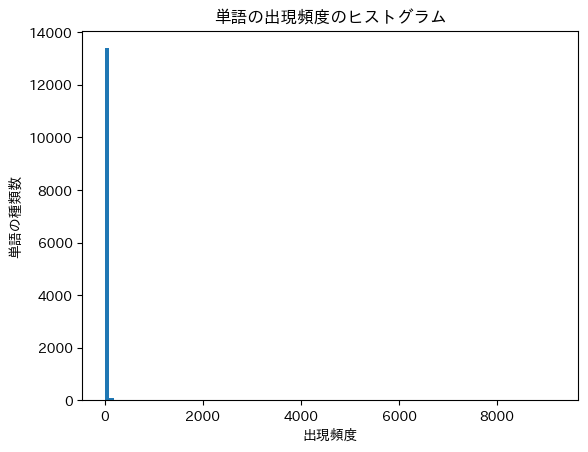

In [28]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

words=[]
for sentence in all_sentence_list:
    for word in sentence:
        words.append(word["surface"])

frequency = Counter(words)
    
plt.hist(frequency.values(),bins=100)
plt.title("単語の出現頻度のヒストグラム")
plt.xlabel("出現頻度")
plt.ylabel("単語の種類数")
plt.show()

# 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

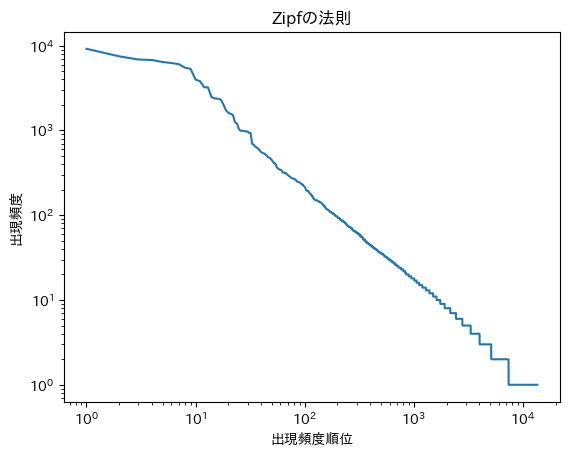

In [ ]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

words=[]
for sentence in all_sentence_list:
    for word in sentence:
        words.append(word["surface"])

frequency = Counter(words)

frequency_values = sorted((frequency.values()), reverse = True)
rank = range(1, len(frequency_values) + 1)

plt.plot(rank, frequency_values)
plt.xscale('log')
plt.yscale('log')
plt.title("Zipfの法則")
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')

plt.show()